In [1]:

import pandas as pd
import numpy as np

from scipy import stats

import os 

os.chdir("/home/ptruong/git/dia_sum/scripts/PXD002952")

from q_value import qvalues
from triqler_output_to_df import  parse_triqler
#os.chdir("/hdd_14T/data/PXD002952/osw_res_20210303/hye124/ttof6600/32fix/full_ts_v")

os.chdir("/hdd_14T/data/PXD002952/20210805_osw_run")

In [2]:
import seaborn as sns

sns.set_context("poster")

In [3]:

# filename has different formatting, we need to change number or implement regex.
experiment_id_mapper = lambda x: x.split("_")[5]
sample_id_mapper = lambda x: x.split("_")[8] #hye124 
specie_mapper = lambda x: x.split("_")[-1]

def read_in_and_filter(filename, m_score_treshold = 0.01):  
    print(filename)
    df = pd.read_csv(filename, sep = "\t")
    df = df[df.decoy != 1]
    df = df[df.m_score < m_score_treshold] # filter away crap, so all values should be good... we take average of top3 here
    print(str(len(df)) + " significantly identified peptides at " + str(m_score_treshold) + " FDR-treshold.")
    print("")
    df["experiment_id"] = df["filename"].map(experiment_id_mapper)
    df["sample_id"] = df["filename"].map(sample_id_mapper)
    sample_id = df.sample_id.unique()[0]
    experiment_id = df.experiment_id.unique()[0]     

    #midx = pd.MultiIndex(levels = [[sample_id],[experiment_id]], codes = [[0],[0]], names = ["sample_id", "experiment_id"])
    df["specie"] = df["ProteinName"].map(specie_mapper)
    df = df.set_index(["specie", "ProteinName", "FullPeptideName", "sample_id", "experiment_id"])
    df = df[["Intensity"]]
    df = pd.DataFrame(df.values, index = df.index)
    
    return df


In [4]:
filename = "osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedro_-_Sample_2_-_SW32_-_Repl1.mzML_with_dscore.csv"
m_score_treshold = 0.01
#m_score_treshold = 1.00
df = pd.read_csv(filename, sep = "\t")
df = df[df.decoy != 1]
df = df[df.m_score < m_score_treshold] # filter away crap, so all values should be good... we take average of top3 here
print(str(len(df)) + " significantly identified peptides at " + str(m_score_treshold) + " FDR-treshold.")
print("")
df["experiment_id"] = df["filename"].map(experiment_id_mapper)
df["sample_id"] = df["filename"].map(sample_id_mapper)
sample_id = df.sample_id.unique()[0]
experiment_id = df.experiment_id.unique()[0] 



20494 significantly identified peptides at 0.01 FDR-treshold.



In [5]:
df


,transition_group_id,peptide_group_label,run_id,filename,RT,id,Sequence,MC,FullPeptideName,Charge,...,aggr_Peak_Area,aggr_Peak_Apex,aggr_Fragment_Annotation,rt_fwhm,masserror_ppm,d_score,m_score,peak_group_rank,experiment_id,sample_id
1,10082_run0,10082,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2453.629739,f_13840781127629990585,NHTWSEFER,0,NHTWSEFER,3,...,0.0;35.345806;11.945334;1.565875;0.0;1.624151;...,2.825662136077881;11.455251932144165;8.9833288...,389;390;391;392;393;394;395;396;397;398;399;40...,24.847999999979948;14.1999999999598;7.09999999...,NaN,2.977562,0.000676,1,003-Pedro,2
27,10169_run0,10169,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,4392.858645,f_5024151980780228768,NIIFFGK,0,NIIFFGK,2,...,34.554546;52.995873;0.0;5.007004;53.867172;0.6...,10.07509508728981;14.985214114189148;0.8592799...,6032;6033;6034;6035;6036;6037;6038;6039;6040;6041,17.749000000019805;17.749000000019805;3.548999...,NaN,4.303503,0.000018,1,003-Pedro,2
39,10225_run0,10225,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2763.528049,f_8061475781606604720,ALAIMCR,0,ALAIMC(UniMod:4)R,2,...,28.789988;4.295903;10.037566;12.991704;95.4320...,11.924682855606079;2.623162187635899;4.9352357...,5297;5298;5299;5300;5301;5302;5303;5304;5305;5306,14.199000000000069;7.100000000039927;14.199000...,NaN,4.511630,0.000010,1,003-Pedro,2
52,10267_run0,10267,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2085.110734,f_43116025940812478,NKLDHYAIIK,1,NKLDHYAIIK,3,...,0.0;2.143316;1397.532227;3.248256;2.328122;21....,142.899003982543945;1.658313393592834;325.7719...,1469;1470;1471;1472;1473;1474;1475;1476;1477;1...,7.099999999980355;7.0999999999799;21.299000000...,NaN,2.188091,0.004325,2,003-Pedro,2
53,10267_run0,10267,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2250.899165,f_11677423016627400552,NKLDHYAIIK,1,NKLDHYAIIK,3,...,50.728786;1.173313;11.471287;0.332155;5.307486...,15.661519050598145;0.835281610488892;5.6124390...,1469;1470;1471;1472;1473;1474;1475;1476;1477;1...,24.847999999979948;7.099999999980355;10.650000...,NaN,3.213447,0.000360,1,003-Pedro,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909328,7103_run0,7103,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,4472.326263,f_4095472491542634620,LMDSIAKGDEVLTNGGLVGR,1,LMDSIAKGDEVLTNGGLVGR,2,...,0.890174;0.738885;0.0;2.856265;6.820577;8.7642...,1.050653055310249;0.477168381214142;0.35210433...,521703;521704;521705;521706;521707;521708;5217...,17.749000000019805;24.847999999979948;7.099000...,1414.764875999999958;-1.367264735758627e-03,2.365304,0.002938,1,003-Pedro,2
909359,7622_run0,7622,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2921.674876,f_2510699481243362398,LQNMEVTDA,0,LQNMEVTDA,1,...,4.003773;11.135196;0.135698;3.148121;2.941009;...,1.820492416620255;3.689639665186406;0.13569830...,520291;520292;520293;520294;520295;520296;5202...,17.749000000019805;14.198999999999614;7.099000...,NaN,2.067016,0.005593,1,003-Pedro,2
909381,8351_run0,8351,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,5070.632434,f_8805729816819156727,LVINGNPITIFQERDPSK,1,LVINGNPITIFQERDPSK,2,...,56.960068;4.570981;6.694418;75.583328;4.765164...,15.920909941196442;1.620381861925125;2.2957277...,520646;520647;520648;520649;520650;520651;5206...,17.749000000019805;31.94800000001942;17.749000...,NaN,4.156404,0.000027,1,003-Pedro,2
909382,8351_run0,8351,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,5166.262013,f_17254509130580777471,LVINGNPITIFQERDPSK,1,LVINGNPITIFQERDPSK,2,...,25.608349;2.331707;0.0;46.666958;0.0;5.123528;...,7.155122876167296;1.158873975276947;0.71535643...,520646;520647;520648;520649;520650;520651;5206...,24.84900000000016;35.497999999980493;35.497999...,NaN,1.924048,0.007490,2,003-Pedro,2


In [6]:

dfs = []
for file in os.listdir():
    if file[-10:] == "dscore.csv":
        dfs.append(read_in_and_filter(file, m_score_treshold=m_score_treshold))
        #print(len(df_part))
        #df = pd.concat([df, df_part],axis = 1)        
df = pd.concat(dfs, axis = 0)


osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedro_-_Sample_2_-_SW32_-_Repl1.mzML_with_dscore.csv
20494 significantly identified peptides at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_007-Pedro_-_Sample_2_-_SW32_-_Repl3.mzML_with_dscore.csv
22787 significantly identified peptides at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_002-Pedro_-_Sample_1_-_SW32_-_Repl1.mzML_with_dscore.csv
20747 significantly identified peptides at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_005-Pedro_-_Sample_2_-_SW32_-_Repl2.mzML_with_dscore.csv
22792 significantly identified peptides at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_004-Pedro_-_Sample_1_-_SW32_-_Repl2.mzML_with_dscore.csv
21445 significantly identified peptides at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_006-Pedro_-_Sample_1_-_SW32_-_Repl3.mzML_with_dscore.csv
21016 significantly identified peptides at 0.01 F

In [7]:
df

0
specie ProteinName  FullPeptideName                                    sample_id experiment_id              
YEAST  P32527_YEAST NHTWSEFER                                          2         003-Pedro        260.265869
HUMAN  P36952_HUMAN NIIFFGK                                            2         003-Pedro        467.945740
       Q9UHX1_HUMAN ALAIMC(UniMod:4)R                                  2         003-Pedro        589.961060
       P62750_HUMAN NKLDHYAIIK                                         2         003-Pedro      14755.210000
                                                                                 003-Pedro        432.422791
...                                                                                                      ...
YEAST  P36060_YEAST LPTEDSEMGLVLASALFAK                                1         006-Pedro        595.679504
HUMAN  P07339_HUMAN AIGAVPLIQGEYMIPC(UniMod:4)EK                       1         006-Pedro        791.408813
       P29401_HUMAN M(UniMod:35)AAISESNINLC(UniMod:4)GSHC(UniMod:4)... 1         006-Pedro       2770.063232
       P09211_HUMAN MLLADQGQSWKEEVVTVETWQEGSLK                         1         006-Pedro        972.247498
       Q9BXW7_HUMAN MLVSGQGPVMENAQGLGFR                                1         006-Pedro        128.514038

[129281 rows x 1 columns]

In [8]:
df = np.log2(df) # log-transform

In [9]:
df

0
specie ProteinName  FullPeptideName                                    sample_id experiment_id           
YEAST  P32527_YEAST NHTWSEFER                                          2         003-Pedro       8.023842
HUMAN  P36952_HUMAN NIIFFGK                                            2         003-Pedro       8.870197
       Q9UHX1_HUMAN ALAIMC(UniMod:4)R                                  2         003-Pedro       9.204476
       P62750_HUMAN NKLDHYAIIK                                         2         003-Pedro      13.848937
                                                                                 003-Pedro       8.756299
...                                                                                                   ...
YEAST  P36060_YEAST LPTEDSEMGLVLASALFAK                                1         006-Pedro       9.218393
HUMAN  P07339_HUMAN AIGAVPLIQGEYMIPC(UniMod:4)EK                       1         006-Pedro       9.628279
       P29401_HUMAN M(UniMod:35)AAISESNINLC(UniMod:4)GSHC(UniMod:4)... 1         006-Pedro      11.435703
       P09211_HUMAN MLLADQGQSWKEEVVTVETWQEGSLK                         1         006-Pedro       9.925180
       Q9BXW7_HUMAN MLVSGQGPVMENAQGLGFR                                1         006-Pedro       7.005782

[129281 rows x 1 columns]

In [10]:
x = len(df[df.index.get_level_values("sample_id") == "1"].index.get_level_values("FullPeptideName").unique())
x_paper = 34851
print(f"Iteration 1 has {x} peptides identified.")
print(f"Reported iteration 1 is {x_paper} peptides identifies. ")
print(f"Diff {x_paper - x} ({(x_paper/x - 1)})")

Iteration 1 has 18013 peptides identified.
Reported iteration 1 is 34851 peptides identifies. 
Diff 16838 (0.9347693332593128)


In [11]:
x = len(df[df.index.get_level_values("sample_id") == "2"].index.get_level_values("FullPeptideName").unique())
x_paper = 35110
print(f"Iteration 2 has {x} peptides identified.")
print(f"Reported iteration 2 is {x_paper} peptides identifies. ")
print(f"Diff {x_paper - x} ({(x_paper/x - 1)})")

Iteration 2 has 18479 peptides identified.
Reported iteration 2 is 35110 peptides identifies. 
Diff 16631 (0.899994588451756)


In [12]:

import matplotlib.pyplot as plt
import seaborn as sns 

def get_peptide_mu_sigma(df):
    df_means = df.groupby(df.index.get_level_values("FullPeptideName")).mean()
    
    df_stat = pd.DataFrame(df_means.values, index = df_means.index, columns = ["mu"])
    df_stat["std"] = df.groupby(df.index.get_level_values("FullPeptideName")).std()
    df_stat["std/mu-ratio"] = df_stat["std"] / df_stat["mu"]
    return df_stat

def select_specie_and_sample(df, specie = "HUMAN", sample = "1"):
    return df.iloc[(df.index.get_level_values("specie") == specie) & (df.index.get_level_values("sample_id") == sample), :]

def select_sample(df, sample = "1"):
    return df.iloc[(df.index.get_level_values("sample_id") == sample), :]

In [13]:
mu_sig_sample1 = get_peptide_mu_sigma(select_sample(df, sample = "1"))
mu_sig_sample2 = get_peptide_mu_sigma(select_sample(df, sample = "2"))

bins = [i*2 for i in range(11)]
mu_sig_sample1["binned_mu"] = pd.cut(mu_sig_sample1["mu"], bins)
mu_sig_sample1["quantile_bin_mu"] = pd.qcut(mu_sig_sample1["mu"], q=8)

mu_sig_sample2["binned_mu"] = pd.cut(mu_sig_sample2["mu"], bins)
mu_sig_sample2["quantile_bin_mu"] = pd.qcut(mu_sig_sample2["mu"], q=8)

In [14]:
mu_sig_sample1

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.848707,0.186341,0.015727,"(10, 12]","(10.106, 16.058]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.373339,0.072459,0.007730,"(8, 10]","(8.924, 9.402]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.621483,0.172539,0.016244,"(10, 12]","(10.106, 16.058]"
(UniMod:1)AAAAAATAAAAASIR,7.439218,NaN,NaN,"(6, 8]","(6.784, 7.527]"
(UniMod:1)AAAAAAVGPGAGGAGSAVPGGAGPC(UniMod:4)ATVSVFPGAR,9.458841,0.165066,0.017451,"(8, 10]","(9.402, 10.106]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,8.211739,0.647104,0.078802,"(8, 10]","(8.044, 8.493]"
YYTGNYDQYVK,6.856831,0.047528,0.006931,"(6, 8]","(6.784, 7.527]"
YYTGVVNNNEMVALQR,6.353259,0.120964,0.019040,"(6, 8]","(-2.509, 6.784]"


Text(0.5, 1.0, 'sample2 - std/mu vs quantile_bin_mu for log-transformed peptide values')

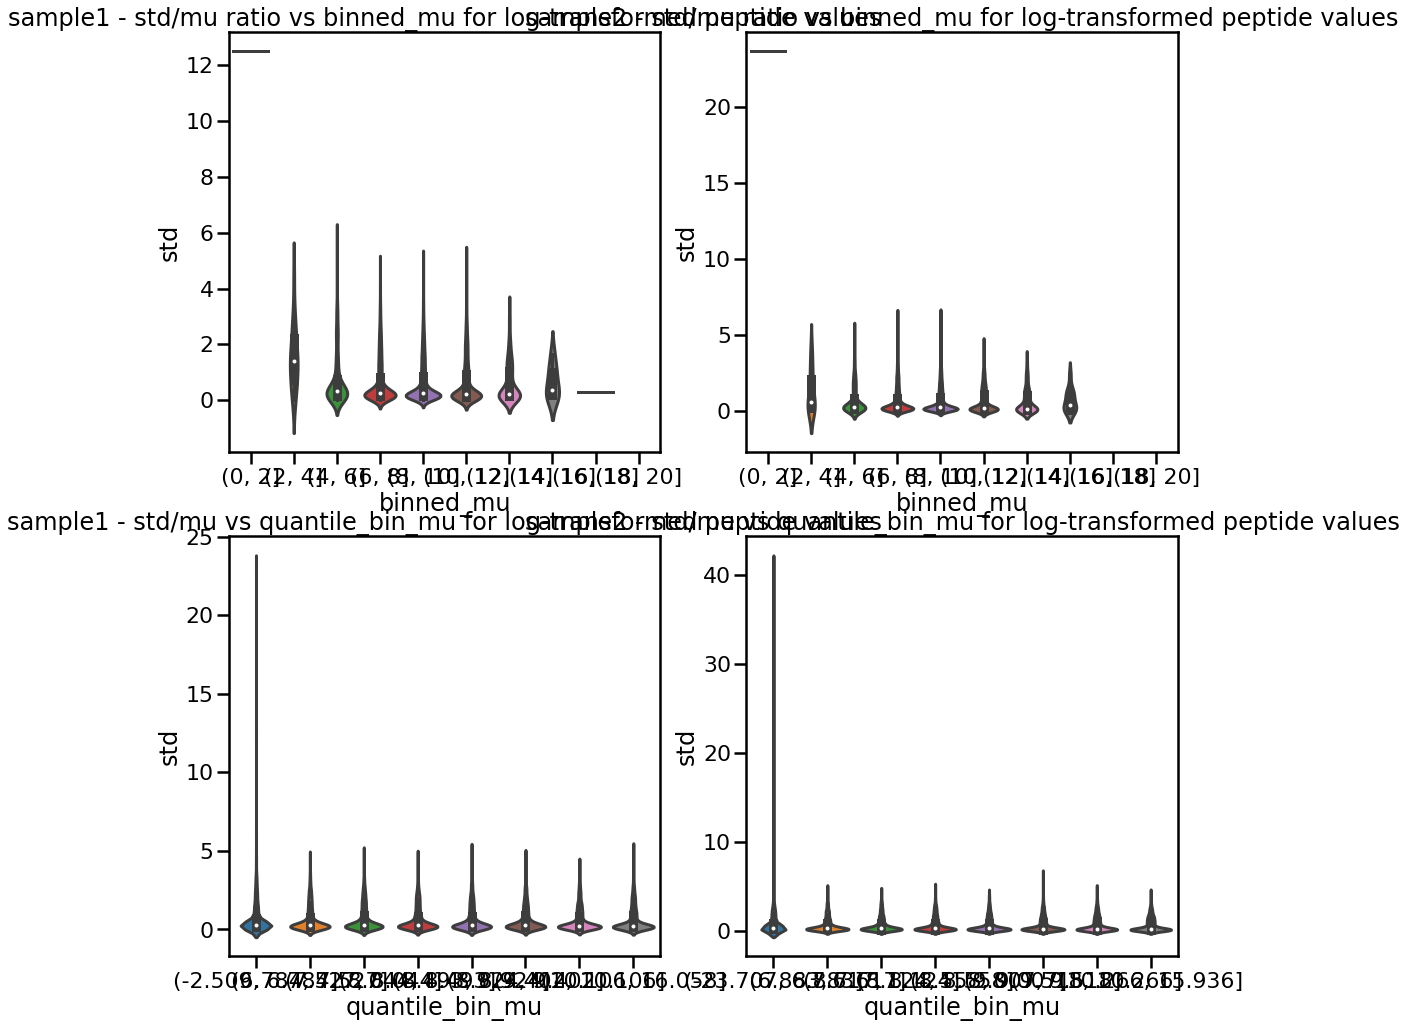

In [15]:
f, ax = plt.subplots(2, 2, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample1, ax=ax[0,0])
ax[0,0].set_title("sample1 - std/mu ratio vs binned_mu for log-transformed peptide values")

sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample2, ax=ax[0,1])
ax[0,1].set_title("sample2 - std/mu ratio vs binned_mu for log-transformed peptide values")

sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample1, ax=ax[1,0])
ax[1,0].set_title("sample1 - std/mu vs quantile_bin_mu for log-transformed peptide values")

sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample2, ax=ax[1,1])
ax[1,1].set_title("sample2 - std/mu vs quantile_bin_mu for log-transformed peptide values")


In [16]:
df["intensity"] = df[0]
df = df.drop([0], axis = 1)
df_stats = get_peptide_mu_sigma(df)

In [17]:
df.intensity.values.max()

17.81083895236996

In [18]:
df_stats["mu"] 

bins = [i*2 for i in range(11)]
df_stats["binned_mu"] = pd.cut(df_stats["mu"], bins,  include_lowest=True)
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=20)




In [19]:
df_stats


,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.841087,0.217675,0.018383,"(10.0, 12.0]","(10.803, 15.997]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.295848,0.182061,0.019585,"(8.0, 10.0]","(9.159, 9.351]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.573412,0.134254,0.012697,"(10.0, 12.0]","(10.243, 10.803]"
(UniMod:1)AAAAAATAAAAASIR,7.021585,0.590622,0.084115,"(6.0, 8.0]","(7.011, 7.312]"
(UniMod:1)AAAAAAVGPGAGGAGSAVPGGAGPC(UniMod:4)ATVSVFPGAR,9.443570,0.134668,0.014260,"(8.0, 10.0]","(9.351, 9.594]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,8.153196,0.507414,0.062235,"(8.0, 10.0]","(8.134, 8.316]"
YYTGNYDQYVK,6.796401,0.089472,0.013165,"(6.0, 8.0]","(6.625, 7.011]"
YYTGVVNNNEMVALQR,6.177771,0.397473,0.064339,"(6.0, 8.0]","(5.994, 6.625]"


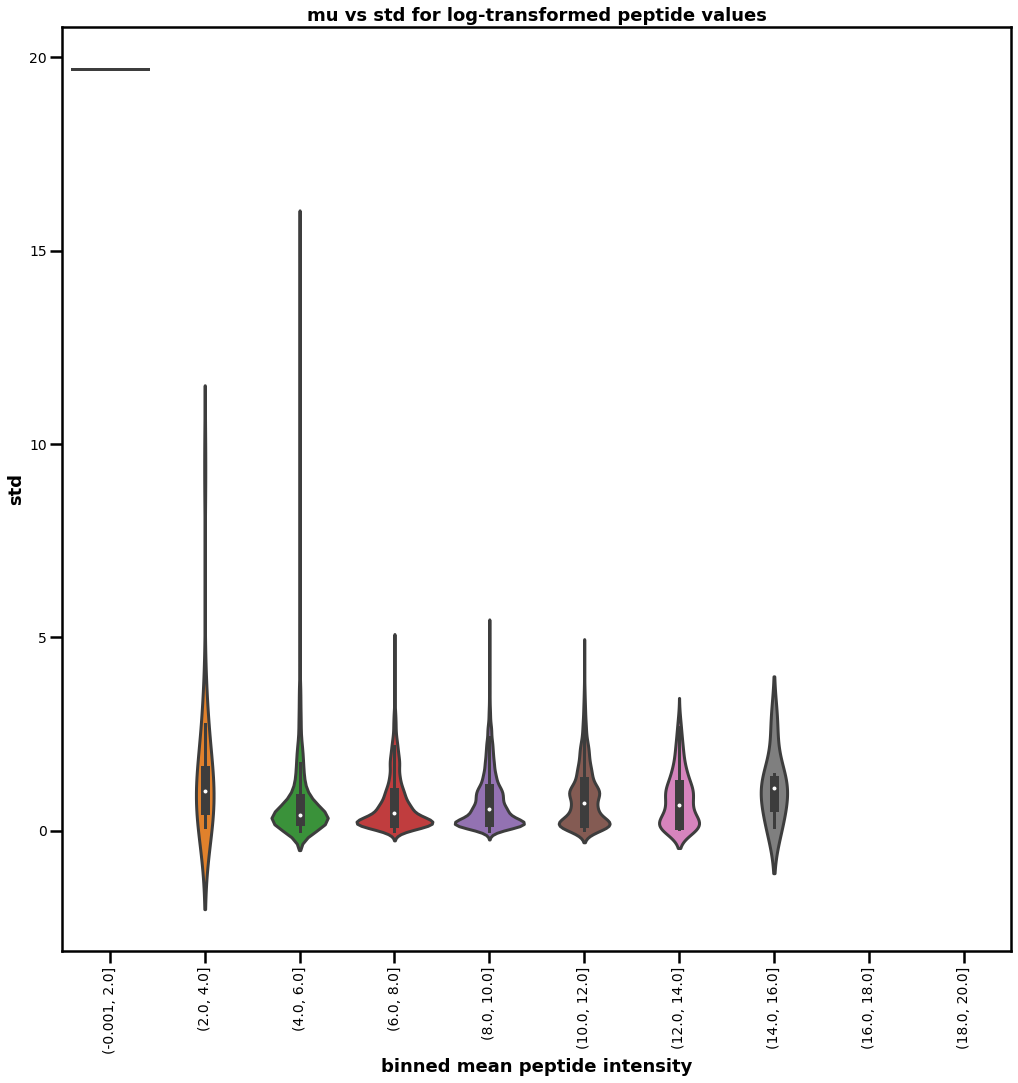

In [20]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")

ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)


In [21]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.841087,0.217675,0.018383,"(10.0, 12.0]","(10.803, 15.997]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.295848,0.182061,0.019585,"(8.0, 10.0]","(9.159, 9.351]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.573412,0.134254,0.012697,"(10.0, 12.0]","(10.243, 10.803]"
(UniMod:1)AAAAAATAAAAASIR,7.021585,0.590622,0.084115,"(6.0, 8.0]","(7.011, 7.312]"
(UniMod:1)AAAAAAVGPGAGGAGSAVPGGAGPC(UniMod:4)ATVSVFPGAR,9.443570,0.134668,0.014260,"(8.0, 10.0]","(9.351, 9.594]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,8.153196,0.507414,0.062235,"(8.0, 10.0]","(8.134, 8.316]"
YYTGNYDQYVK,6.796401,0.089472,0.013165,"(6.0, 8.0]","(6.625, 7.011]"
YYTGVVNNNEMVALQR,6.177771,0.397473,0.064339,"(6.0, 8.0]","(5.994, 6.625]"


# Adjust to remove peptides with missing values in samples

In [22]:
peptides_included_in_all_samples = (df.groupby("FullPeptideName").count() >= 6).index

In [23]:
df_filtered = df[df.index.get_level_values("FullPeptideName").isin(peptides_included_in_all_samples)]

In [24]:
df_stats_filtered = get_peptide_mu_sigma(df_filtered)

In [25]:
bins = [i*2 for i in range(11)]
df_stats_filtered["binned_mu"] = pd.cut(df_stats_filtered["mu"], bins,  include_lowest=True)
df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=8)


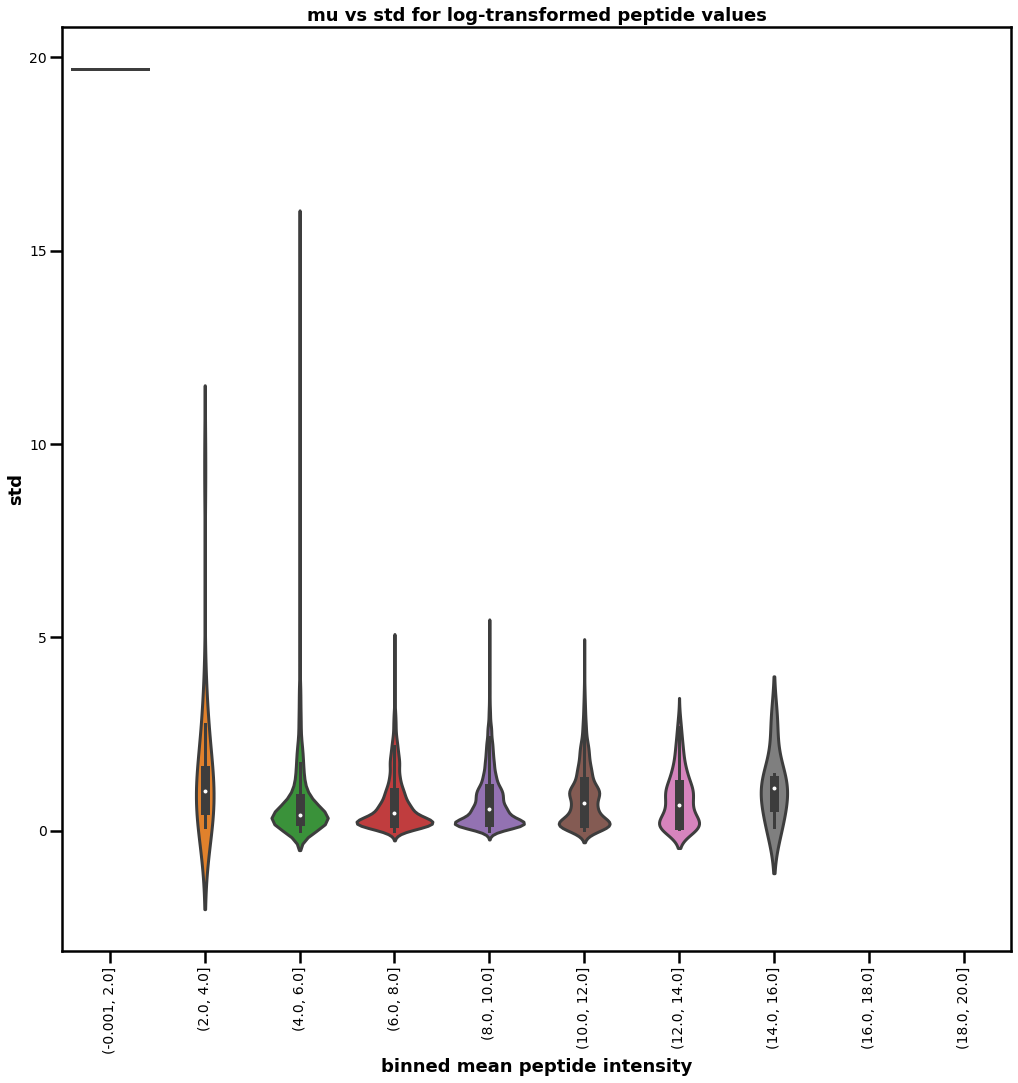

In [26]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats_filtered, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")

ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)



In [27]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.841087,0.217675,0.018383,"(10.0, 12.0]","(10.803, 15.997]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.295848,0.182061,0.019585,"(8.0, 10.0]","(9.159, 9.351]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.573412,0.134254,0.012697,"(10.0, 12.0]","(10.243, 10.803]"
(UniMod:1)AAAAAATAAAAASIR,7.021585,0.590622,0.084115,"(6.0, 8.0]","(7.011, 7.312]"
(UniMod:1)AAAAAAVGPGAGGAGSAVPGGAGPC(UniMod:4)ATVSVFPGAR,9.443570,0.134668,0.014260,"(8.0, 10.0]","(9.351, 9.594]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,8.153196,0.507414,0.062235,"(8.0, 10.0]","(8.134, 8.316]"
YYTGNYDQYVK,6.796401,0.089472,0.013165,"(6.0, 8.0]","(6.625, 7.011]"
YYTGVVNNNEMVALQR,6.177771,0.397473,0.064339,"(6.0, 8.0]","(5.994, 6.625]"


# Quantile binning

In [28]:
q = 10
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=q, precision = 0)
df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=q, precision = 0)


In [29]:
bin_median_function = lambda x: round((x.left + x.right)/2, 2)
df_stats["quantile_bin_mu_median_of_bin_range"] = df_stats["quantile_bin_mu"].apply(bin_median_function)
df_stats_filtered["quantile_bin_mu_median_of_bin_range"] = df_stats_filtered["quantile_bin_mu"].apply(bin_median_function)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


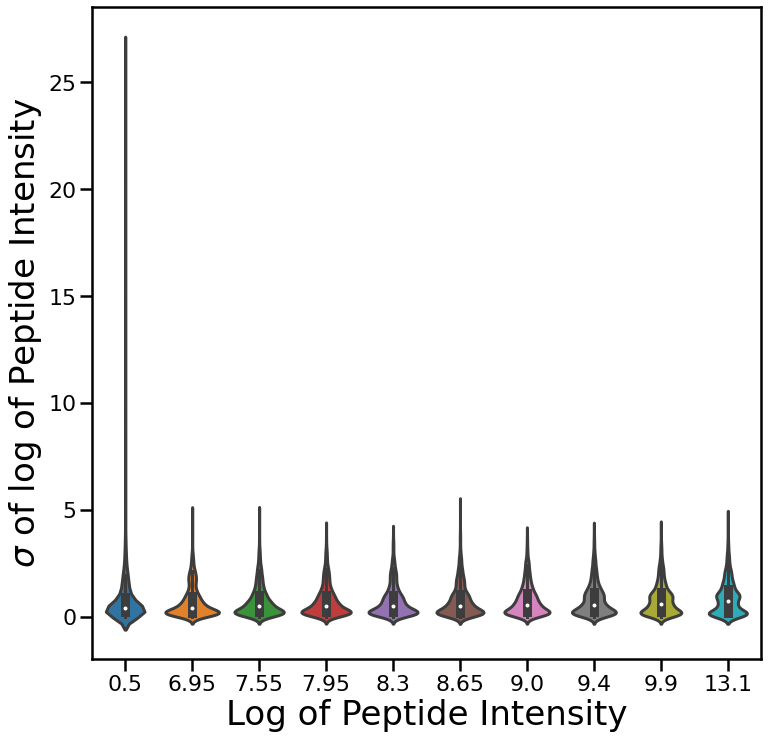

In [30]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel("Logarithm of Peptide intensity", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")


#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)


#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")


#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


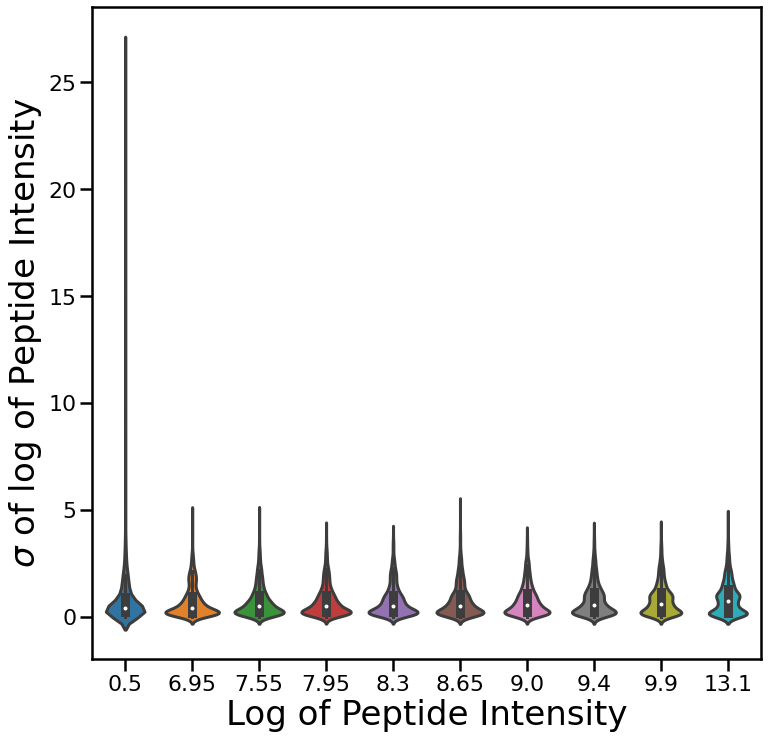

In [31]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel("Logarithm of Peptide intensity", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")

#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)

#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


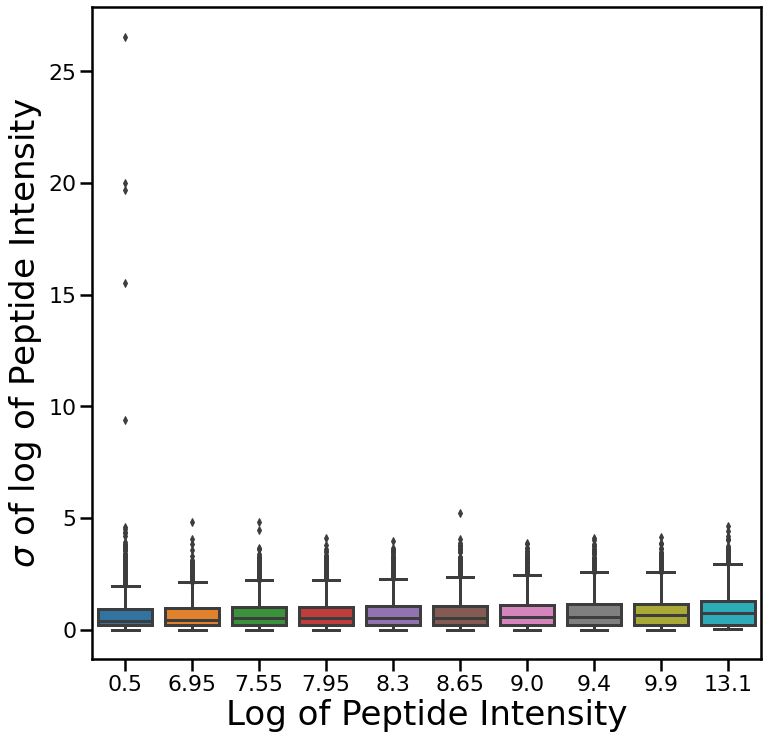

In [32]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)


ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
ax.tick_params(axis='x', which='major')#,labelrotation=90)


#ax.set_ylim([-1,6])

0.7823083049808333

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(0.0, 5.0)

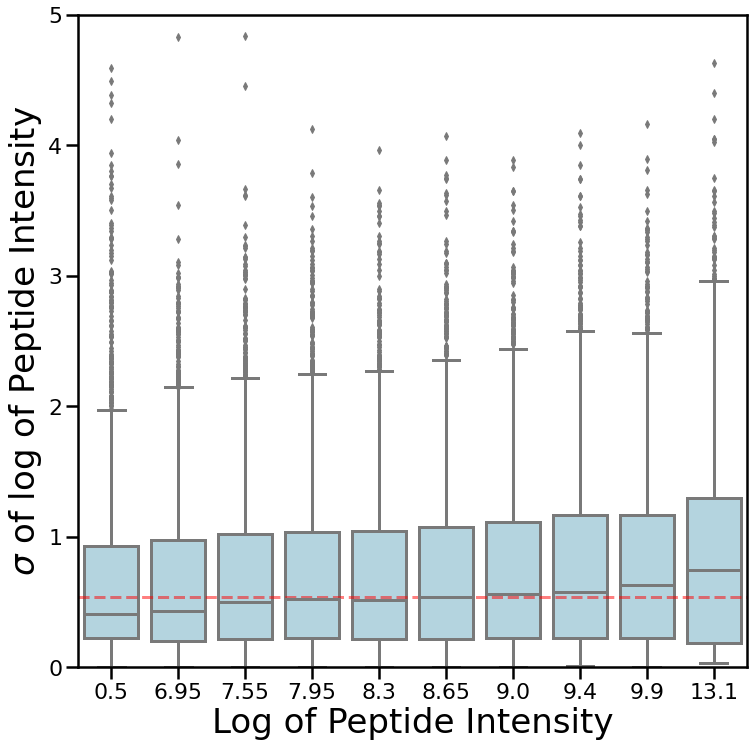

In [57]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
ax.axhline(y=df_stats_filtered["std"].median(), color='r', linestyle='--', alpha = 0.5)
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax, color="lightblue")


ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.

ax.set_ylim([0,5])

#ax.set_ylim([-1,6])

# KDE histograms of the bin-distributions

In [34]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu,quantile_bin_mu_median_of_bin_range
FullPeptideName,,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.841087,0.217675,0.018383,"(10.0, 12.0]","(10.2, 16.0]",13.10
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.295848,0.182061,0.019585,"(8.0, 10.0]","(9.2, 9.6]",9.40
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.573412,0.134254,0.012697,"(10.0, 12.0]","(10.2, 16.0]",13.10
(UniMod:1)AAAAAATAAAAASIR,7.021585,0.590622,0.084115,"(6.0, 8.0]","(6.6, 7.3]",6.95
(UniMod:1)AAAAAAVGPGAGGAGSAVPGGAGPC(UniMod:4)ATVSVFPGAR,9.443570,0.134668,0.014260,"(8.0, 10.0]","(9.2, 9.6]",9.40
...,...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,8.153196,0.507414,0.062235,"(8.0, 10.0]","(8.1, 8.5]",8.30
YYTGNYDQYVK,6.796401,0.089472,0.013165,"(6.0, 8.0]","(6.6, 7.3]",6.95
YYTGVVNNNEMVALQR,6.177771,0.397473,0.064339,"(6.0, 8.0]","(-5.6, 6.6]",0.50


In [35]:
bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

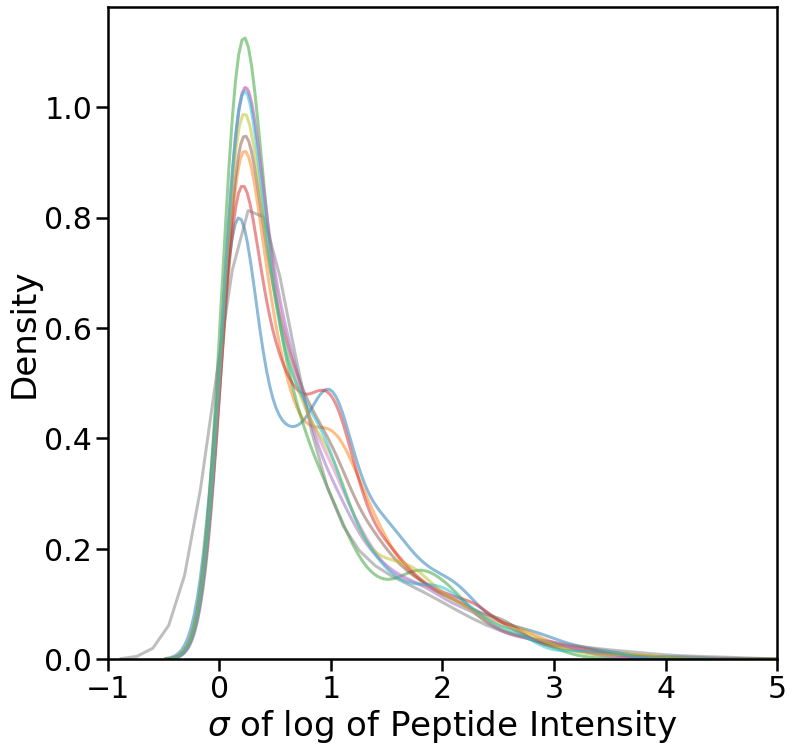

In [36]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 34)



for line in ax.get_lines():
    line.set_alpha(0.5)

In [37]:
bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()

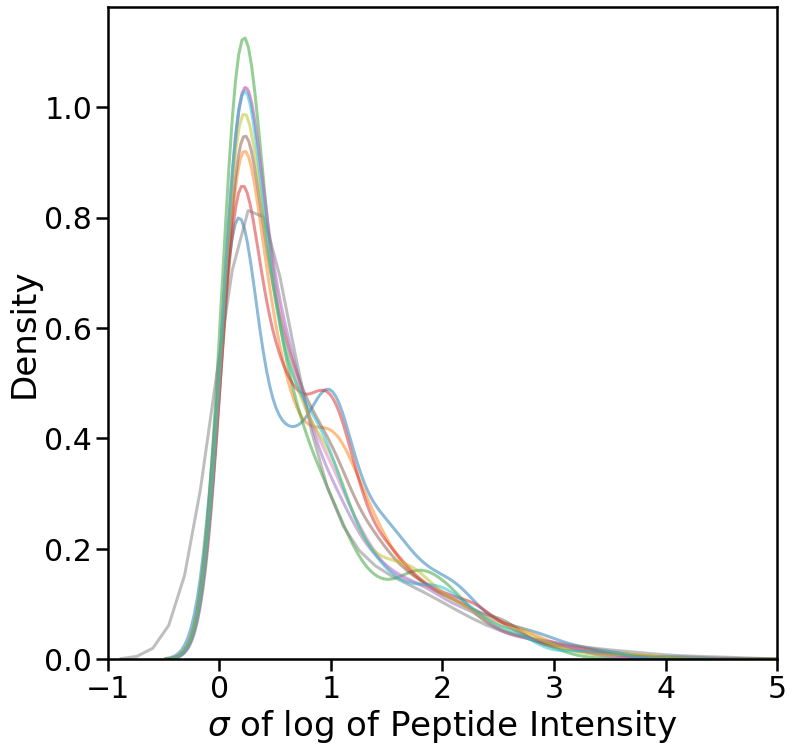

In [38]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 34)


for line in ax.get_lines():
    line.set_alpha(0.5)

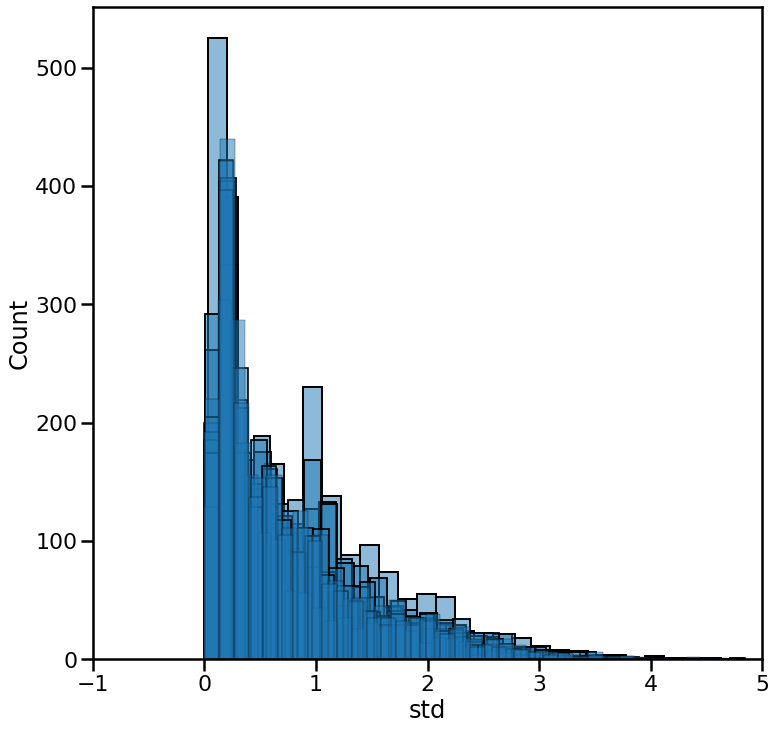

In [39]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.histplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

for line in ax.get_lines():
    line.set_alpha(0.5)

# Violin overlap

In [40]:
from matplotlib.pyplot import cm
n = len(bin_vals)
color = cm.rainbow(np.linspace(0, 1, n))

Text(0, 0.5, '$\\sigma$ of log of Peptide Intensity ')

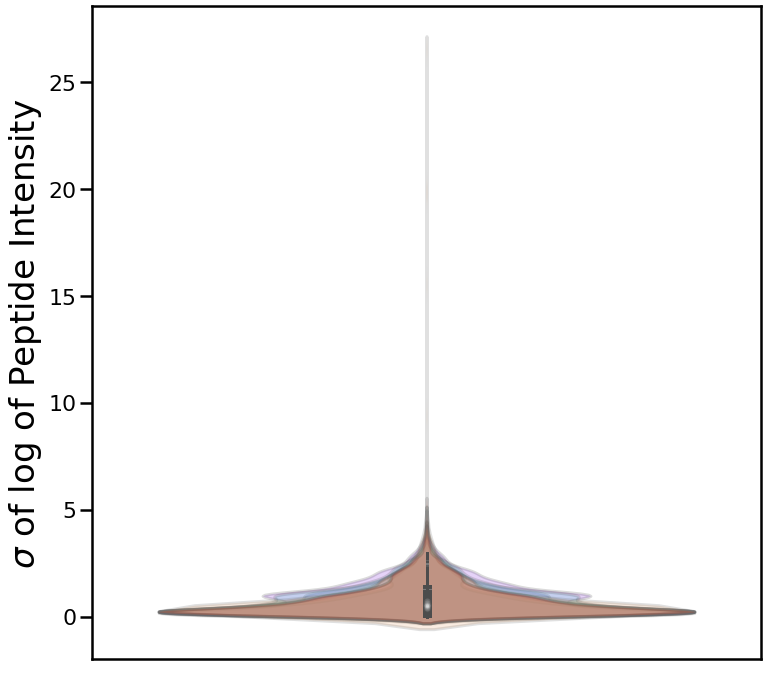

In [41]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

for i in range(len(bin_vals)):
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)

Text(0, 0.5, '$\\sigma$ of log of Peptide Intensity ')

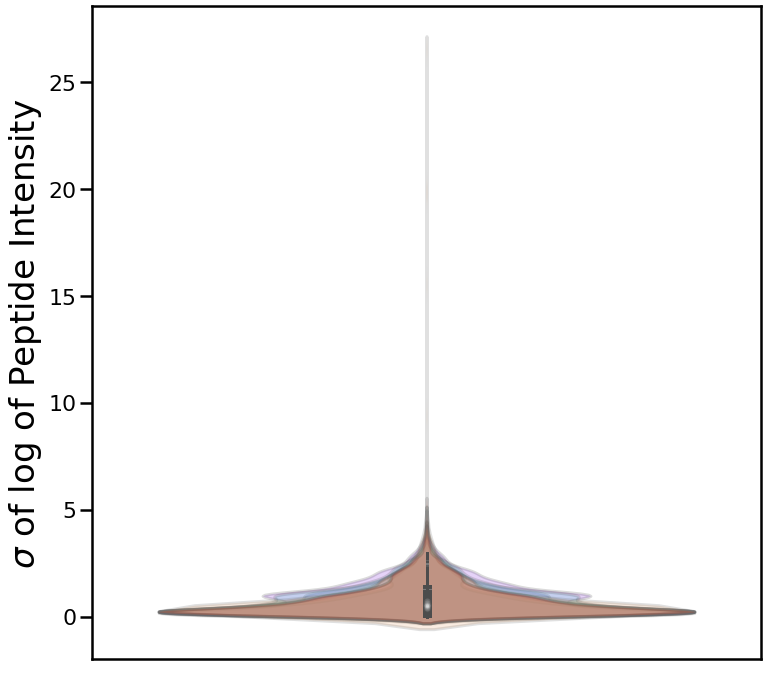

In [42]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()
for i in range(len(bin_vals)):
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
